In [4]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [33]:
gridsizes = (5, 10, 20, 30)
solvers = ('policy_iteration', 'value_iteration')
module = {'policy_iteration':'policyiteration', 'value_iteration':'valueiteration'}

average_solvetimes = []

for solver in solvers:
    
    benchmarks = []
    
    for gridsize in gridsizes:
        
        statement = '%s.%s(test_maze.grid, .9)' % (module[solver], solver)
        
        setup = """
import maze
import %s
import valueiteration
test_maze = maze.Maze(w=%s, h=%s)
        """ % (module[solver], gridsize, gridsize)
    
        solve_times = []
    
        for _ in range(0,10):
            solve_times.append(timeit.timeit(statement, setup=setup, number=1))
    
        benchmarks.append(solve_times)
    
    average_solvetimes.append([np.mean(times) for times in benchmarks])

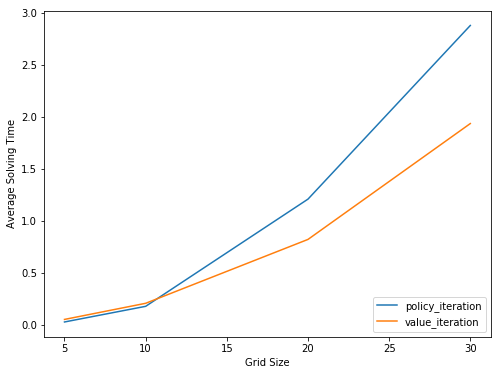

In [35]:
plt.figure(figsize=(8,6))

for i in range(0, len(solvers)):
    plt.plot(gridsizes, average_solvetimes[i], label=solvers[i])

plt.legend(loc="lower right")
plt.xlabel("Grid Size")
plt.ylabel("Average Solving Time")
plt.show()